OLA : 

Problem_statement : 

Whether drivers leave the company dues to various factors like age, gender, joining date and salary etc and try to predict the churn.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ola_driver_scaler.csv')

In [3]:
df.head(12)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


Need to somehow bring the data each driver level

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df.shape

(19104, 13)

In [6]:
df.isna().sum() / len(df)  * 100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

Assumption : if the last working date is NaN that could possibly mean that the drivers stopped reporting to OLA or quit or changed the company.

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [9]:
for each in  ["MMM-YY","Dateofjoining","LastWorkingDate"] : 
    df[each] = pd.to_datetime(df[each])

Missing value imputation : 

Gender : Gender of the driver – Male : 0, Female: 1

In [10]:
# age , gender , last working date 

df["Gender"].value_counts(dropna=False)

0.0    11074
1.0     7978
NaN       52
Name: Gender, dtype: int64

Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

In [11]:
df["Education_Level"].value_counts()

1    6864
2    6327
0    5913
Name: Education_Level, dtype: int64

Let's try Knn imputation -  for this we need to consider the numerical features 

In [12]:
num_df = df.select_dtypes(np.number)

In [13]:
num_df.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [14]:
num_df.drop(columns='Driver_ID',inplace=True)

In [15]:
# knn imputation 

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean',)

df[num_df.columns] = imputer.fit_transform(df[num_df.columns])

nan_euclidean trivia :

The nan_euclidean metric is a special metric provided by scikit-learn's PairwiseDistances class specifically for handling missing values (NaNs) in the data. It is similar to the Euclidean distance metric, but it treats NaNs as a separate category and assigns a large distance to any pair of samples that contains at least one NaN.

This is useful when you have missing values in your data and you want to impute them using the KNNImputer. By using the nan_euclidean metric, the KNNImputer will ignore the NaNs when finding the nearest neighbors, ensuring that the imputed values are based on the non-missing data.

In [16]:
df.isna().sum() / len(df)  * 100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.000000
Gender                   0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

let's bring down the data to the each driver level :

In [17]:
df[df["Driver_ID"] == 500]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
3342,2019-01-01,500,39.0,0.0,C12,1.0,103119.0,2018-05-11,NaT,4.0,4.0,612140.0,1.0
3343,2019-02-01,500,39.0,0.0,C12,1.0,103119.0,2018-05-11,NaT,4.0,4.0,508740.0,1.0
3344,2019-03-01,500,39.0,0.0,C12,1.0,103119.0,2018-05-11,NaT,4.0,4.0,1683170.0,1.0
3345,2019-04-01,500,39.0,0.0,C12,1.0,103119.0,2018-05-11,NaT,4.0,4.0,402470.0,1.0
3346,2019-05-01,500,39.0,0.0,C12,1.0,103119.0,2018-05-11,NaT,4.0,4.0,0.0,1.0
3347,2019-06-01,500,39.0,0.0,C12,1.0,103119.0,2018-05-11,NaT,4.0,4.0,0.0,1.0
3348,2019-07-01,500,40.0,0.0,C12,1.0,103119.0,2018-05-11,NaT,4.0,4.0,300000.0,3.0
3349,2019-08-01,500,40.0,0.0,C12,1.0,103119.0,2018-05-11,NaT,4.0,4.0,2654880.0,3.0
3350,2019-09-01,500,40.0,0.0,C12,1.0,103119.0,2018-05-11,NaT,4.0,4.0,1435040.0,3.0
3351,2019-10-01,500,40.0,0.0,C12,1.0,103119.0,2018-05-11,2019-10-10,4.0,4.0,0.0,1.0


The data is at montly level and we need to bring it to the driver level and if we observe each driver reports at OLA driver hub at the start of the month , first let's do a groupby at the driver level, then monthly level

In [18]:
# age : max , gender : first , city : first  , education : last , income :  last , dateofjoining : last , 
# lastworkingdate : last , joining designation : last , grade : last , total business value : sum , quarterly rating : last

agg_dict = {'Age':'max', 'Gender':'first','City':'first',
             'Education_Level':'last','Income':'last',
             'Dateofjoining':'last','LastWorkingDate':'last',
             'Joining Designation':'last','Grade':'last',
             'Total Business Value':'sum','Quarterly Rating':'last'}

df1 = df.groupby(['Driver_ID','MMM-YY']).aggregate(agg_dict)


Now the data is at driver level for each month 

In [19]:
df1

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   
...                    ...     ...  ...              ...      ...   
2788      2020-08-01  30.0     0.0  C27              2.0  70254.0   
          2020-09-01  30.0     0.0  C27              2.0  70254.0   
          2020-10-01  30.0     0.0  C27              2.0  70254.0   
          2020-11-01  30.0     0.0  C27              2.0  70254.0   
          2020-12-01  30.0     0.0  C27              2.0  70254.0   

                     Dateofjoining LastWorkingDate  Joining Designation  \
Driver_ID MMM-YY                                                          
1         2019-01-01    2018-12-24             NaT                  1.0   
          2019-02-01    2018-12-24             NaT                  1.0   
          2019-03-01    2018-12-24      2019-03-11                  1.0   
2         2020-11-01    2020-11-06             NaT                  2.0   
          2020-12-01    2020-11-06             NaT                  2.0   
...                            ...             ...                  ...   
2788      2020-08-01    2020-06-08             NaT                  2.0   
          2020-09-01    2020-06-08             NaT                  2.0   
          2020-10-01    2020-06-08             NaT                  2.0   
          2020-11-01    2020-06-08             NaT                  2.0   
          2020-12-01    2020-06-08             NaT                  2.0   

                      Grade  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                     
1         2019-01-01    1.0             2381060.0               2.0  
          2019-02-01    1.0             -665480.0               2.0  
          2019-03-01    1.0                   0.0               2.0  
2         2020-11-01    2.0                   0.0               1.0  
          2020-12-01    2.0                   0.0               1.0  
...                     ...                   ...               ...  
2788      2020-08-01    2.0              740280.0               3.0  
          2020-09-01    2.0              448370.0               3.0  
          2020-10-01    2.0                   0.0               2.0  
          2020-11-01    2.0              200420.0               2.0  
          2020-12-01    2.0              411480.0               2.0  

[19104 rows x 11 columns]

In [20]:
df1.reset_index(inplace=True)

In [21]:
df1.sort_values(by=['Driver_ID','MMM-YY'],inplace=True)

In [22]:
df1

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-01-01,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,2381060.0,2.0
1,1,2019-02-01,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,-665480.0,2.0
2,1,2019-03-01,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,0.0,2.0
3,2,2020-11-01,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0
4,2,2020-12-01,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,2020-08-01,30.0,0.0,C27,2.0,70254.0,2020-06-08,NaT,2.0,2.0,740280.0,3.0
19100,2788,2020-09-01,30.0,0.0,C27,2.0,70254.0,2020-06-08,NaT,2.0,2.0,448370.0,3.0
19101,2788,2020-10-01,30.0,0.0,C27,2.0,70254.0,2020-06-08,NaT,2.0,2.0,0.0,2.0
19102,2788,2020-11-01,30.0,0.0,C27,2.0,70254.0,2020-06-08,NaT,2.0,2.0,200420.0,2.0


In [23]:
# bringing the data to the driver level 
#  age : max , gender : last, city : last  , education : last , income :  last ,   
# lastworkingdate : last , joining designation : last , grade : last , total business value : sum , quarterly rating : last

add_driver_dict = {'Age':'max', 'Gender':'last','City':'last',
             'Education_Level':'last','Income':'last',
             'Dateofjoining':'last','LastWorkingDate':'last',
             'Joining Designation':'last','Grade':'last',
             'Total Business Value':'sum','Quarterly Rating':'last'}

df_driver = df1.groupby('Driver_ID').aggregate(add_driver_dict)

In [24]:
df1["Driver_ID"].nunique()

2381

In [25]:
df_driver

,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
Driver_ID,,,,,,,,,,,
1,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0
2,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0
4,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0
5,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0
6,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2784,34.0,0.0,C24,0.0,82815.0,2015-10-15,NaT,2.0,3.0,21748820.0,4.0
2785,34.0,1.0,C9,0.0,12105.0,2020-08-28,2020-10-28,1.0,1.0,0.0,1.0
2786,45.0,0.0,C19,0.0,35370.0,2018-07-31,2019-09-22,2.0,2.0,2815090.0,1.0


In [26]:
df_driver.reset_index(inplace=True)

In [27]:
df_driver.head(4)

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0
1,2,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0
2,4,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0
3,5,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0


Feature Engineering :

Creating a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

In [28]:
# difference between quareterly rating min and max 

quarterly_rating_change = df1.groupby('Driver_ID').aggregate({'Quarterly Rating':['first','last']}).reset_index()


In [29]:
quarterly_rating_change.columns = ['Driver_ID','Quarterly Rating_first','Quarterly Rating_last']
quarterly_rating_change["quarterly_rating_inc"] = quarterly_rating_change["Quarterly Rating_last"] > quarterly_rating_change["Quarterly Rating_first"]
quarterly_rating_change["quarterly_rating_inc"] = np.where(quarterly_rating_change["quarterly_rating_inc"]==True,1,0)

In [30]:
quarterly_rating_change.head(2)

,Driver_ID,Quarterly Rating_first,Quarterly Rating_last,quarterly_rating_inc
0,1,2.0,2.0,0
1,2,1.0,1.0,0


In [31]:
# add quarterly_rating_inc to df_driver 

df_driver = pd.merge(df_driver,quarterly_rating_change[["Driver_ID","quarterly_rating_inc"]],how='inner',on='Driver_ID')

In [32]:
# df_driver["quarterly_rating_inc_1"] = quarterly_rating_change["quarterly_rating_inc"].values
# df_driver.drop(["quarterly_rating_inc_1"],axis=1,inplace=True)

Target variable creation: Creating a column called last_working_date_target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

In [33]:
# if last working date is not null then change the value to 1 else 0

df_driver["last_working_date_target"] = np.where(df_driver["LastWorkingDate"].isnull(),0,1)

In [34]:
#df_driver.drop(["last_working_date_inc"],axis=1,inplace=True)

Creating a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [35]:
# monthly income increase 

monthly_inc = df1.groupby('Driver_ID').aggregate({'Income':['first','last']}).reset_index()

monthly_inc.columns = ['Driver_ID','Income_first','Income_last']
monthly_inc["monthly_income_increase"] = np.where(monthly_inc["Income_last"] > monthly_inc["Income_first"],1,0)
df_driver["monthly_income_increase"] = monthly_inc["monthly_income_increase"].values

In [36]:
df_driver.head(5)

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,quarterly_rating_inc,last_working_date_target,monthly_income_increase
0,1,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0,0,1,0
3,5,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0,1,0,0


Why are calculating quarterly rating change and monthly income increase ? 

Because in real world driver rating directly affects the income and bonuses received. If the rating hasn't improved then the income will not increase. 
So, if the income hasn't increased then drivers potentially will be leaving the company.

So we need to calculate the change in rating and monthly income.

In [37]:
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Driver_ID                 2381 non-null   int64         
 1   Age                       2381 non-null   float64       
 2   Gender                    2381 non-null   float64       
 3   City                      2381 non-null   object        
 4   Education_Level           2381 non-null   float64       
 5   Income                    2381 non-null   float64       
 6   Dateofjoining             2381 non-null   datetime64[ns]
 7   LastWorkingDate           1616 non-null   datetime64[ns]
 8   Joining Designation       2381 non-null   float64       
 9   Grade                     2381 non-null   float64       
 10  Total Business Value      2381 non-null   float64       
 11  Quarterly Rating          2381 non-null   float64       
 12  quarterly_rating_inc

In [38]:
df_driver.drop(["LastWorkingDate"],axis=1,inplace=True)

In [39]:
df_driver.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.377018e+01,5.933265e+00,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,4.105838e-01,4.914963e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Quarterly Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.0,1.0,2.0,4.0
quarterly_rating_inc,2381.0,1.503570e-01,3.574961e-01,0.0,0.0,0.0,0.0,1.0


There are 2381 employees in the dataset. The minimum age of the employee in the data is 21 years and the maximum age is 58 years. 75% of the employees have their monthly income less than or equal to 75,986 units / rupees. 50% of the employees have acquired 8,17,680 as the their total business value.

In [40]:
df_driver["City"].nunique()

29

In [41]:
df_driver["Education_Level"].value_counts()

2.0    802
1.0    795
0.0    784
Name: Education_Level, dtype: int64

In [42]:
df_driver["Gender"].value_counts(normalize=True)

0.0    0.587988
1.0    0.409492
0.6    0.001260
0.2    0.000840
0.4    0.000420
Name: Gender, dtype: float64

More than 58% of the employees are male and 41 % are female.

In [43]:
df_driver.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'quarterly_rating_inc', 'last_working_date_target',
       'monthly_income_increase'],
      dtype='object')

In [44]:
df_driver["quarterly_rating_inc"].value_counts(normalize=True)

0    0.849643
1    0.150357
Name: quarterly_rating_inc, dtype: float64

In [45]:
df_driver["last_working_date_target"].value_counts(normalize=True)

1    0.678706
0    0.321294
Name: last_working_date_target, dtype: float64

close to 68 % of the employees have left the company.

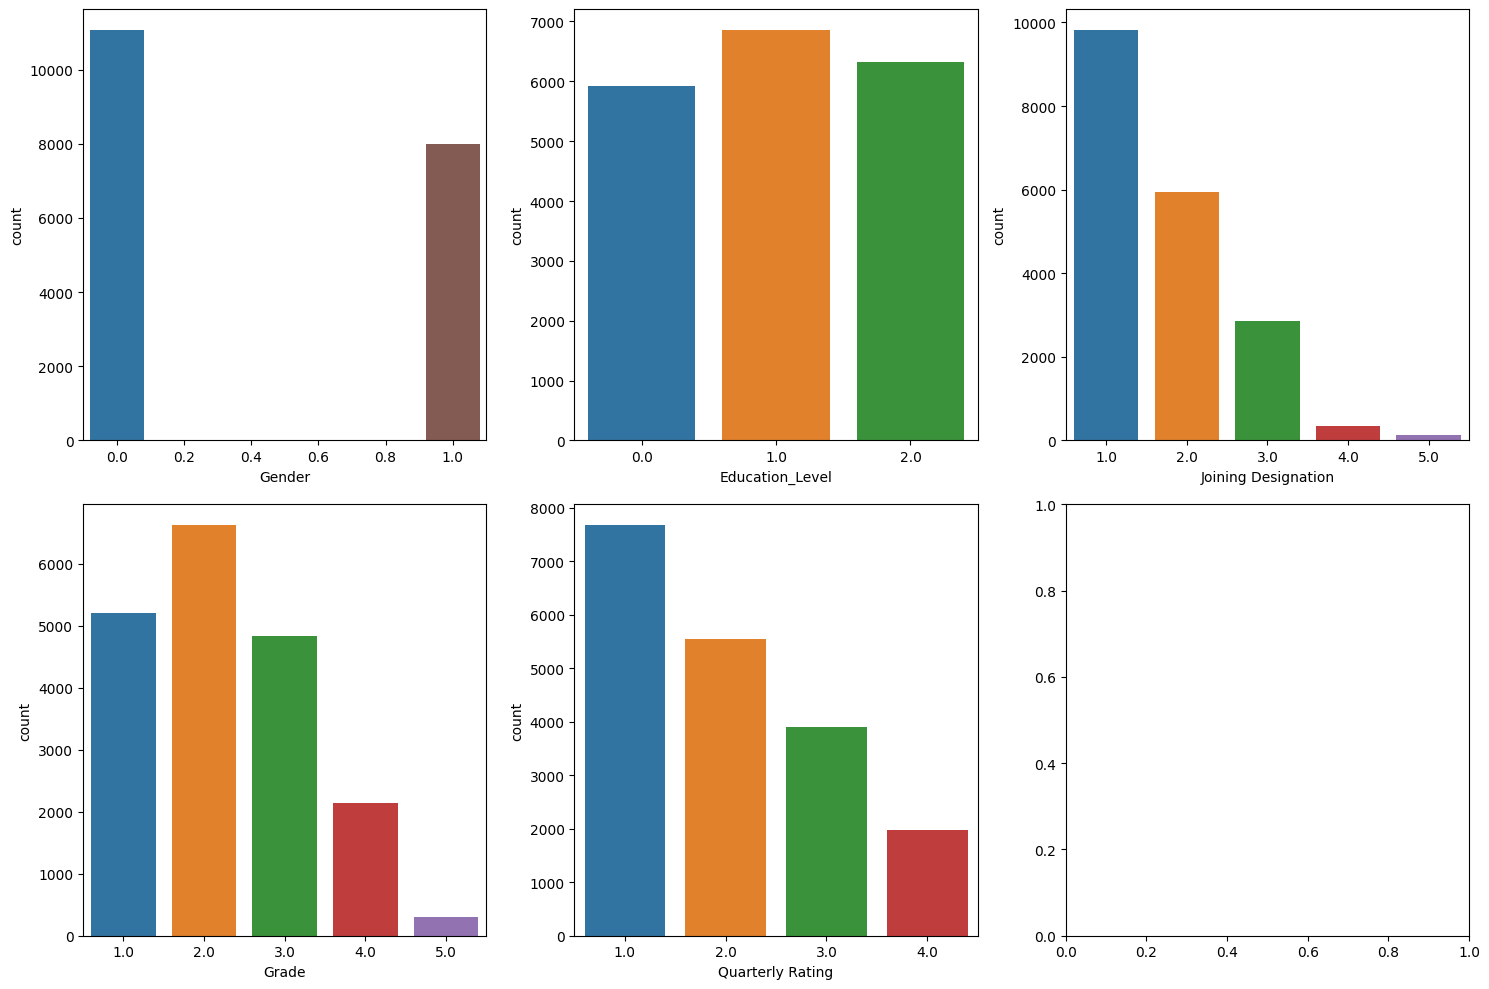

In [46]:
n = ['Gender','Education_Level','Joining Designation','Grade',"Quarterly Rating"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, var in enumerate(n):
    ax = axes[i // 3, i % 3]
    sns.countplot(x=var, data=df, ax=ax)

plt.tight_layout()
plt.show()

In [47]:
df_driver["quarterly_rating_inc"] = df_driver["quarterly_rating_inc"].astype("int64")

In [48]:
df_driver.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'quarterly_rating_inc', 'last_working_date_target',
       'monthly_income_increase'],
      dtype='object')

In [49]:
df_driver["quarterly_rating_inc"].value_counts()

0    2023
1     358
Name: quarterly_rating_inc, dtype: int64

<AxesSubplot: >

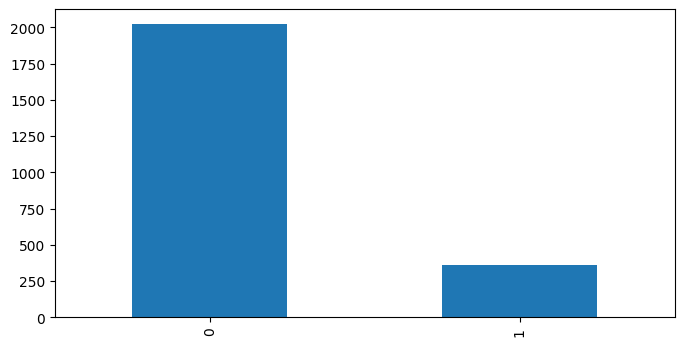

In [50]:
df_driver["quarterly_rating_inc"].value_counts().plot(kind="bar",figsize=(8,4))


out of 2381 employees, only 358 employees have increased quarterly rating , improved quarterly rating improves monthly income and only 43 employees has their monthly income increased compared to their first  month.

In [51]:
df_driver["Joining Designation"].value_counts()

1.0    1026
2.0     815
3.0     493
4.0      36
5.0      11
Name: Joining Designation, dtype: int64

In [52]:
df_driver["Grade"].value_counts()

2.0    855
1.0    741
3.0    623
4.0    138
5.0     24
Name: Grade, dtype: int64

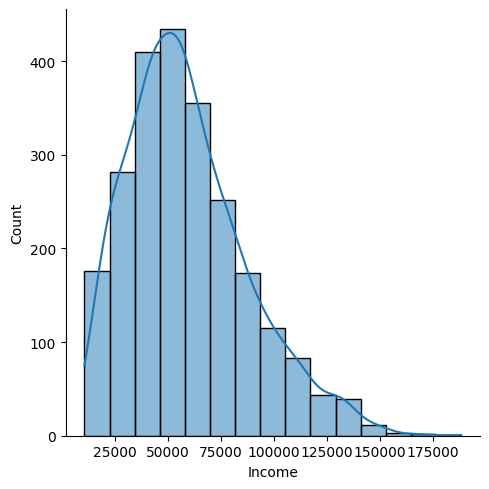

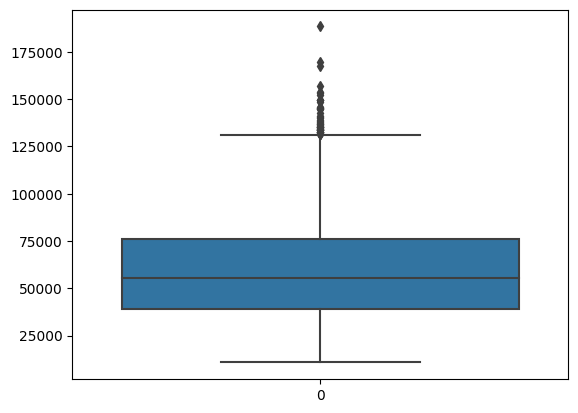

In [53]:
sns.displot(df_driver["Income"],bins=15,kde=True)
plt.show()
sns.boxplot(df_driver["Income"])
plt.show()

Most of the employees are between the age of 30 to 35
and the median income is 50000 rupees.

Demographics:

Gender: 1400 male, 975 female.
Cities: 152 from C20, 101 from C15 [top-cities]

Education: 802 graduate, 795 with 12th grade.

Joining Designation: 1026 has a designation of  1, 815 joined at 2.

Grade : 855 had grade 2 at reporting time.

Performance: 1744 had a last quarterly rating of 1.

Quarterly rating: 2023 employees did not have quarterly rating inprovement in the last quarter.


In [54]:
df_driver.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'quarterly_rating_inc', 'last_working_date_target',
       'monthly_income_increase'],
      dtype='object')

Let's check the affect of different valriable on target variable :

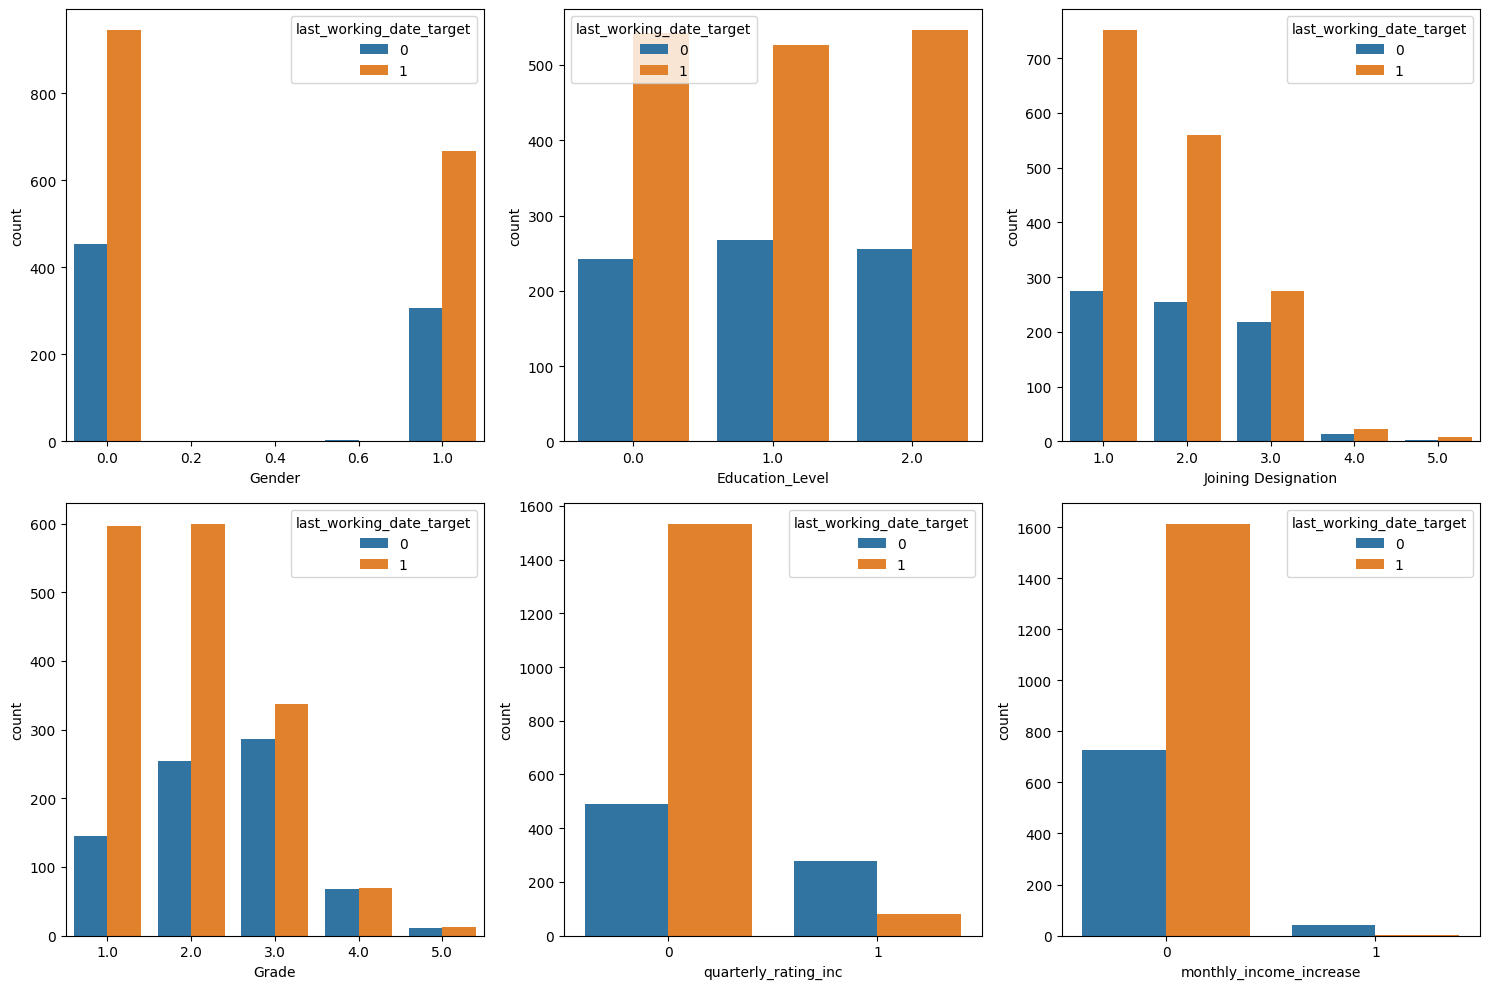

In [55]:
# 'Gender', 'Education_Level',
#         'Joining Designation', 'Grade', 
#        'Quarterly Rating', 'quarterly_rating_inc',
#        'monthly_income_increase'

#  hue = 'last_working_date_target' 

n = ['Gender','Education_Level','Joining Designation','Grade',"quarterly_rating_inc","monthly_income_increase"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, var in enumerate(n):
    ax = axes[i // 3, i % 3]
    sns.countplot(x=var, hue="last_working_date_target", data=df_driver, ax=ax)

plt.tight_layout()
plt.show()


- The proportion education is more or less the same for both the employees who left the organization and those who did not leave.

- The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.

- The employees who have their grade as 3 , 4 ,5 at the time of reporting are less likely to leave the organization.

- The employees whose quarterly rating has increased are less likely to leave the organization and the same applies to monthly income increase.

In [56]:
# We can bin the numerical columns and check them against the target
df_driver.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'quarterly_rating_inc', 'last_working_date_target',
       'monthly_income_increase'],
      dtype='object')

From the heatmap we could see that the income is directly proportional to grade and joining designation

<AxesSubplot: >

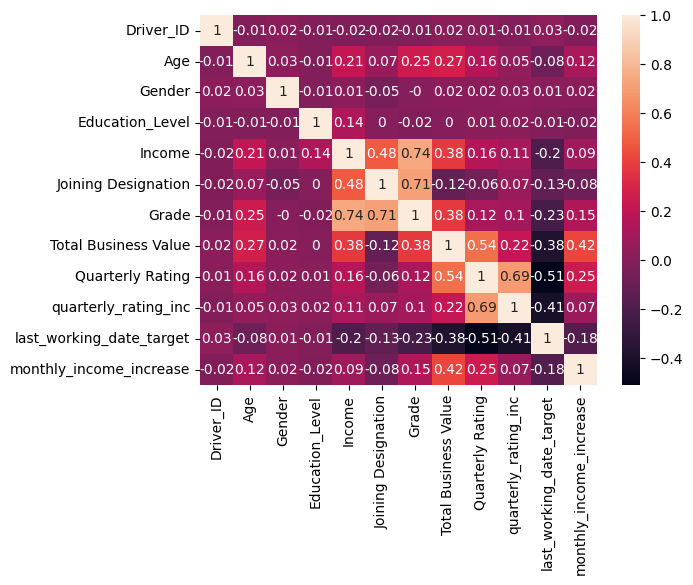

In [57]:
sns.heatmap(df_driver.corr().round(2),annot=True)

Encoding :

In [58]:
# Driver_ID and Dateofjoining are specifc to employee and they are not useful for determining the target
df_driver.drop(columns=["Driver_ID","Dateofjoining"],inplace=True)



city needs to be encoded , target is imbalanced , and the data needs to be scaled


In [59]:
df_driver["City"].nunique()

29

In [60]:
# OHE the city column 

df_driver = pd.get_dummies(df_driver,columns=["City"],drop_first=True)


In [61]:
df_driver.columns

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating',
       'quarterly_rating_inc', 'last_working_date_target',
       'monthly_income_increase', 'City_C10', 'City_C11', 'City_C12',
       'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18',
       'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23',
       'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29',
       'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8',
       'City_C9'],
      dtype='object')

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [63]:
x = df_driver.drop("last_working_date_target",axis=1)
y = df_driver["last_working_date_target"]   
# train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [64]:
# print the shapes 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1904, 38)
(1904,)
(477, 38)
(477,)


In [65]:
# scaling the data 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [66]:
x_train = pd.DataFrame(x_train,columns=x.columns)
x_test = pd.DataFrame(x_test,columns=x.columns)

In [67]:
y_train.value_counts() 
# class imbalance 

1    1287
0     617
Name: last_working_date_target, dtype: int64

### Try it with Tree based models :

Random Forest Classifier with different class weight methods with grid search :

In [68]:
# class weights 
from sklearn.utils import class_weight

In [70]:
rf_clf = RandomForestClassifier(class_weight="balanced") 
# grid search for hyperparameter tuning 
param = {'max_depth':[2,3,4,5,6], 'n_estimators':[50,100,150,200]}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf_clf,param,cv=5,scoring="f1",n_jobs=-1)
grid.fit(x_train,y_train)

print( "Best parameters  :", grid.best_params_)  

print("Best score : ", grid.best_score_) # f_1 score


Best parameters  : {'max_depth': 4, 'n_estimators': 150}
Best score :  0.8561585103901477


              precision    recall  f1-score   support

           0       0.68      0.64      0.66       148
           1       0.84      0.86      0.85       329

    accuracy                           0.79       477
   macro avg       0.76      0.75      0.76       477
weighted avg       0.79      0.79      0.79       477

[[ 95  53]
 [ 45 284]]


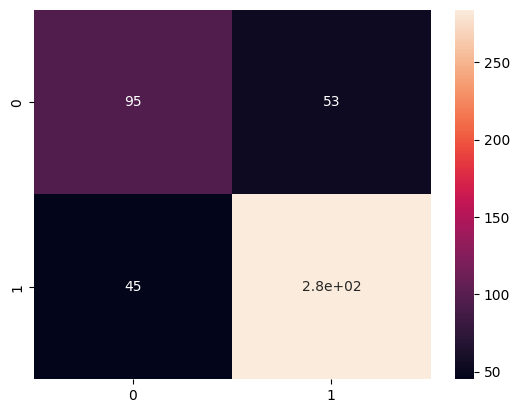

In [71]:
# classification report
y_pred = grid.predict(x_test)
print(classification_report(y_test,y_pred))
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()


In [72]:
# balanced_subsample

rf_clf = RandomForestClassifier(class_weight="balanced_subsample") 
# grid search for hyperparameter tuning 
param = {'max_depth':[2,3,4,5,6], 'n_estimators':[50,100,150,200]}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf_clf,param,cv=5,scoring="f1",n_jobs=-1)
grid.fit(x_train,y_train)

print( "Best parameters  :", grid.best_params_)  

print("Best score : ", grid.best_score_) # f_1 score


Best parameters  : {'max_depth': 5, 'n_estimators': 150}
Best score :  0.85531044106477


              precision    recall  f1-score   support

           0       0.71      0.64      0.67       148
           1       0.85      0.88      0.86       329

    accuracy                           0.81       477
   macro avg       0.78      0.76      0.77       477
weighted avg       0.80      0.81      0.80       477

[[ 95  53]
 [ 39 290]]


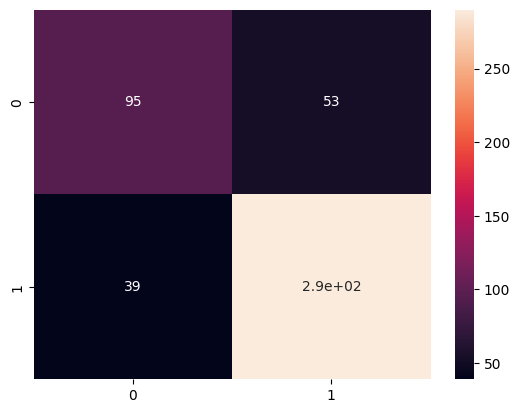

In [73]:
y_pred = grid.predict(x_test)
print(classification_report(y_test,y_pred))
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

A slight improvements in precison and f1 score when a bootstrapped sample-weightage method is used.

SMOTE for balancing the train data :

In [ ]:
#!pip install imblearn

In [77]:
# SMOTE 

print("before smote : ", y_train.value_counts())
print("before smote : ", x_train.shape)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)

x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train)  


print("after smote : ", y_train_smote.value_counts())
print("after smote : ", x_train_smote.shape)


before smote :  1    1287
0     617
Name: last_working_date_target, dtype: int64
before smote :  (1904, 38)
after smote :  1    1287
0    1287
Name: last_working_date_target, dtype: int64
after smote :  (2574, 38)


Applying random forest with SMOTE :

In [78]:
rf_clf = RandomForestClassifier(class_weight="balanced") 
# grid search for hyperparameter tuning 
param = {'max_depth':[2,3,4,5,6], 'n_estimators':[50,100,150,200]}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf_clf,param,cv=5,scoring="f1",n_jobs=-1)
grid.fit(x_train_smote,y_train_smote)

print( "Best parameters  :", grid.best_params_)  

print("Best score : ", grid.best_score_) # f_1 score


Best parameters  : {'max_depth': 6, 'n_estimators': 150}
Best score :  0.8216449082214726


              precision    recall  f1-score   support

           0       0.72      0.63      0.67       148
           1       0.84      0.89      0.86       329

    accuracy                           0.81       477
   macro avg       0.78      0.76      0.77       477
weighted avg       0.80      0.81      0.80       477

[[ 93  55]
 [ 37 292]]


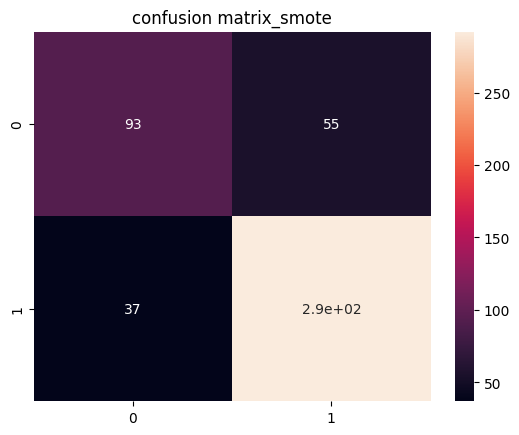

In [80]:
# classification report
y_pred = grid.predict(x_test)
print(classification_report(y_test,y_pred))
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.title("confusion matrix_smote")
sns.heatmap(cm,annot=True)
plt.show()


If we observe closely Smote didn't help much in this case , the metrics are on par with 'balanced_subsample'.

In [ ]:
# Xgboost 
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train,y_train)
y_pred = xgb_clf.predict(x_test)
print(classification_report(y_test,y_pred))